In [21]:
import numpy as np
import pandas as pd
%matplotlib inline
def gbm0(n_years=10, n_scenerios = 3, mu = 0.07, sigma=0.15, steps_per_year=12, s_0 = 100):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps,n_scenerios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_0*(1+rets).cumprod()
    return prices

In [16]:
p = gbm(10, n_scenerios=3)
p.shape

(120, 3)

In [17]:
p.head()

,0,1,2
0,102.998762,101.999245,98.064426
1,101.432988,104.871983,103.494554
2,99.389124,104.639487,108.352398
3,101.958644,108.053428,117.319791
4,102.123686,103.672390,114.853621


<Axes: >

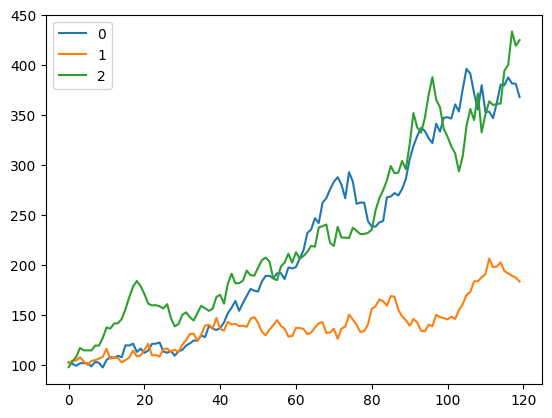

In [18]:
p.plot()

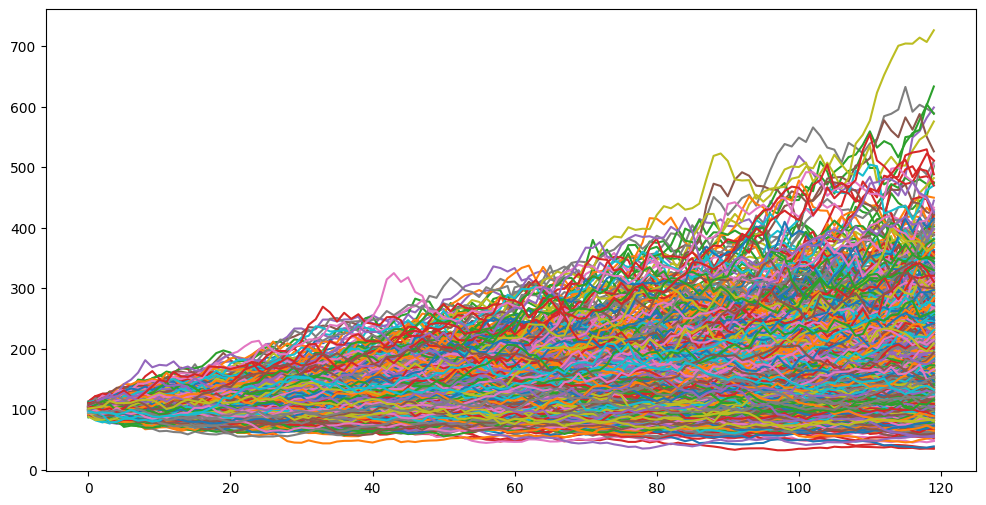

In [32]:
p = gbm0(n_years=10,n_scenerios= 1000).plot(figsize=(12,6),legend=False)

In [28]:
def gbm1(n_years=10, n_scenerios = 3, mu = 0.07, sigma=0.15, steps_per_year=12, s_0 = 100):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_one = np.random.normal(loc=mu*dt+1,scale=(sigma*np.sqrt(dt)),size=(n_steps,n_scenerios))
    rets_plus_one[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_one).cumprod()
    return prices

In [29]:
%timeit gbm0(n_years=5, n_scenerios=1000)

3.11 ms ± 231 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit gbm1(n_years=5, n_scenerios=1000)

2.63 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


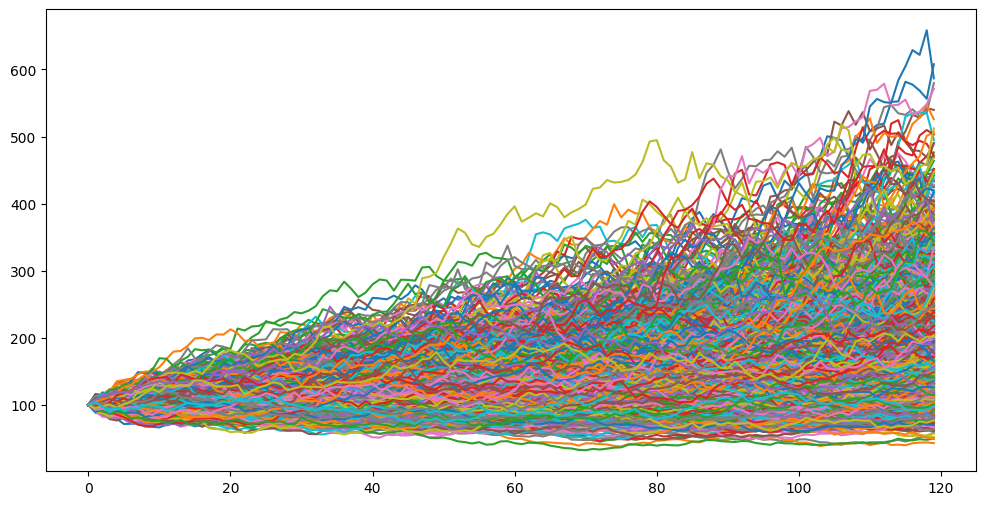

In [33]:
p = gbm1(n_years=10,n_scenerios= 1000).plot(figsize=(12,6),legend=False)